In [1]:
import numpy as np # Importa a biblioteca NumPy para manipulação de arrays e álgebra linear
import pandas as pd # Importa a biblioteca pandas para processamento de dados, especialmente com DataFrames
import seaborn as sns # Importa a biblioteca Seaborn para visualização de dados
import matplotlib.pyplot as plt # Importa a biblioteca Matplotlib para visualizações de gráficos


import os 
# Loop para listar todos os arquivos no diretório '/kaggle/input'
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-price-prediction/sample_submission.csv
/kaggle/input/house-price-prediction/data_description.txt
/kaggle/input/house-price-prediction/train.csv
/kaggle/input/house-price-prediction/test (1).csv


In [2]:
# Carrega os dados de treino e teste em DataFrames
df_1 = pd.read_csv("/kaggle/input/house-price-prediction/train.csv") 
df_2 = pd.read_csv("/kaggle/input/house-price-prediction/test (1).csv")

# Se a coluna 'SalePrice' não existir no DataFrame de teste, ela será criada com valor 0
if 'SalePrice' not in df_2.columns:
    df_2['SalePrice'] = 0
    
# Combina os dados de treino e teste em um único DataFrame
df = pd.concat([df_1, df_2], axis = 0)
df = df.set_index('Id') # Define a coluna 'Id' como índice

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.isna().sum() # Conta os valores ausentes em cada coluna

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [4]:
df_null = df[df.isnull().sum()[df.isnull().sum()>0].index] # Cria um DataFrame com as linhas que possuem valores ausentes

In [5]:
df_null.head() # Visualiza as primeiras linhas com valores ausentes

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,...,2003.0,RFn,2.0,548.0,TA,TA,NaN,NaN,NaN,WD
2,RL,80.0,NaN,AllPub,MetalSd,MetalSd,NaN,0.0,Gd,TA,...,1976.0,RFn,2.0,460.0,TA,TA,NaN,NaN,NaN,WD
3,RL,68.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,...,2001.0,RFn,2.0,608.0,TA,TA,NaN,NaN,NaN,WD
4,RL,60.0,NaN,AllPub,Wd Sdng,Wd Shng,NaN,0.0,TA,Gd,...,1998.0,Unf,3.0,642.0,TA,TA,NaN,NaN,NaN,WD
5,RL,84.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,...,2000.0,RFn,3.0,836.0,TA,TA,NaN,NaN,NaN,WD


<Axes: ylabel='Id'>

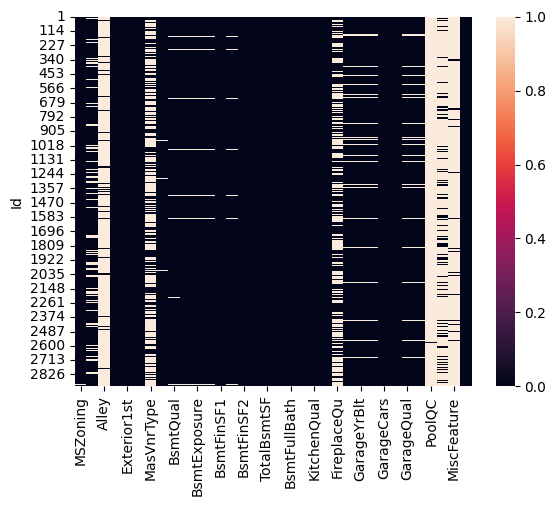

In [6]:
sns.heatmap(df_null.isnull()) # Gera um mapa de calor para visualizar os valores ausentes no DataFrame df_null

In [7]:
# Seleciona as colunas do tipo 'object' (geralmente categóricas ou strings)
df_objects = df[df.select_dtypes(include=['object']).columns] 

# Remove as linhas de 'df' que possuem mais de 1100 valores ausentes nas colunas 'object'
df = df.drop(df[df_objects.isna().sum()[df_objects.isna().sum() >1100].index], axis = 1) 

In [8]:
# Remove as colunas 'object' com mais de 1100 valores ausentes
df_objects = df_objects.drop(columns=df_objects.columns[df_objects.isna().sum() > 1100])
# Preenche os valores ausentes nas colunas 'object' com o valor 'null'
df_objects = df_objects.fillna('null')
# Converte as variáveis categóricas em variáveis binárias (dummies)
df_objects_encoded = pd.get_dummies(df_objects)

In [9]:
# Verifica a distribuição de valores na coluna 'Utilities' para observar se há categorias nulas
df_objects['Utilities'].value_counts()

Utilities
AllPub    2916
null         2
NoSeWa       1
Name: count, dtype: int64

In [10]:
# Remove as colunas que são indicadoras de valores nulos, pois elas não são úteis para o modelo
for i in df_objects_encoded.columns:
    if 'null' in i:
        df_objects_encoded = df_objects_encoded.drop(i, axis = 1)
        print(i)

MSZoning_null
Utilities_null
Exterior1st_null
Exterior2nd_null
BsmtQual_null
BsmtCond_null
BsmtExposure_null
BsmtFinType1_null
BsmtFinType2_null
Electrical_null
KitchenQual_null
Functional_null
GarageType_null
GarageFinish_null
GarageQual_null
GarageCond_null
SaleType_null


In [11]:
# Combina o DataFrame original (sem as colunas 'object') com as colunas codificadas (dummies)
new_df = pd.concat([df, df_objects_encoded], axis = 1)
# Exibe a quantidade de colunas do DataFrame final
len(new_df.columns)

304

In [12]:
# Verifica o número de colunas nos DataFrames original e alterado
len(df.columns), len(df_objects_encoded.columns)

(74, 230)

In [13]:
# Remove novamente as colunas de 'object' que foram transformadas em dummies
new_df = new_df.drop(df.select_dtypes(include=['object']), axis = 1)
# Verifica se ainda existem valores ausentes no DataFrame final
new_df.isna().sum()[new_df.isna().sum()>0]

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

In [14]:
Mode_columns = ['GarageCars', 'GarageYrBlt', 'BsmtFullBath', 'BsmtHalfBath']
Mean_columns = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                'TotalBsmtSF', 'GarageArea']
# Preenche valores ausentes para colunas específicas com a moda (valor mais frequente)
for i in Mode_columns:
    new_df[i] = new_df[i].fillna(new_df[i].mode()[0])
# Preenche valores ausentes para outras colunas com a média (arredondada)
for i in Mean_columns:
    new_df[i] = new_df[i].fillna(np.round(new_df[i].mean()))

# Verifica se existem mais valores ausentes após o preenchimento
new_df.isna().sum()[new_df.isna().sum() > 0] 

Series([], dtype: int64)

In [15]:
training_data = new_df[0:len(df_1)]
testing_data = new_df[len(df_1):]
testing_data = testing_data.drop(columns='SalePrice') # Remove a coluna 'SalePrice' dos dados de teste, pois não será usada durante a previsão

In [16]:
# Importa bibliotecas para criar modelos de aprendizado de máquina
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [17]:
# Separa as variáveis independentes (X) e a variável dependente (y) para o treinamento
X = training_data.drop(columns='SalePrice')
y = training_data['SalePrice']
# Divide os dados de treinamento em conjunto de treinamento e conjunto de validação (80% / 20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)
# Ajusta o formato dos arrays de resposta
Y_train = np.reshape(Y_train,(-1, 1))
Y_test = np.reshape(Y_test,(-1, 1))
X_train.shape, Y_train.shape

((1168, 266), (1168, 1))

In [18]:
# Treina e avalia um modelo de Regressão Linear
model_1 = LinearRegression()
model_1.fit(X, y)
y_pred = model_1.predict(X_test)
mean_squared_error(Y_test, y_pred)

317234576.0310742

In [19]:
# Treina e avalia um modelo de XGBoost
model_2 = XGBRegressor(n_estimators=1000, learning_rate=0.1, random_state=42)
model_2.fit(X, y)
y_pred = model_2.predict(X_test)
mean_squared_error(Y_test, y_pred)

7059.020931452921

In [20]:
# Salva o modelo treinado em um arquivo .pkl usando a biblioteca pickle
import pickle

# Defina o caminho para salvar o modelo
model_filename = "/kaggle/working/house_price_model_2.pkl"

# Salvar model_2 no arquivo .pkl
with open(model_filename, 'wb') as model_file:
    pickle.dump(model_2, model_file)
# Exibe o caminho onde o modelo foi salvo
print(f"Modelo model_2 salvo em {model_filename}")

Modelo model_2 salvo em /kaggle/working/house_price_model_2.pkl


In [21]:
# Treina e avalia um modelo de Regressão Florestal RandomForest
model_3 = RandomForestRegressor(n_estimators=1000)
model_3.fit(X, y)
y_pred = model_3.predict(X_test)
mean_squared_error(Y_test, y_pred)

124668840.47370113

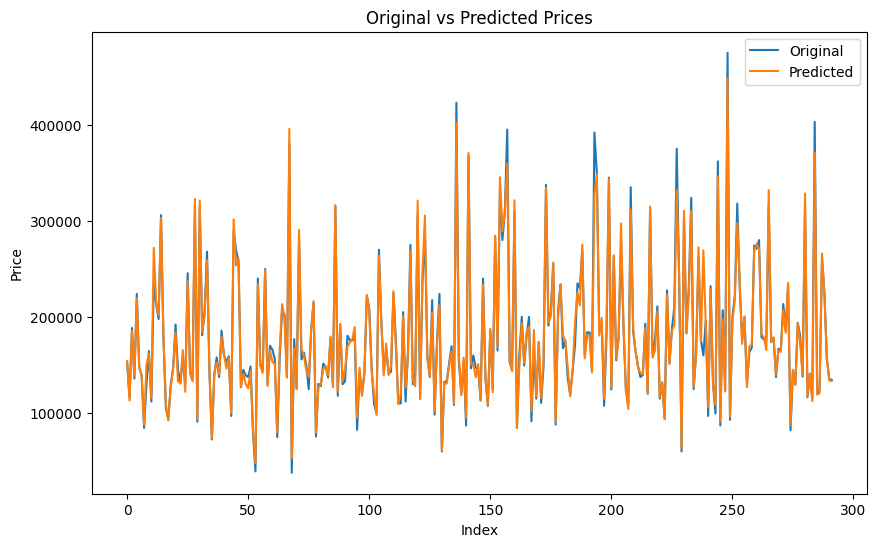

In [22]:
# Ordena os índices com base nas previsões
sort_indices = np.argsort(Y_test)

# Cria um gráfico comparando os preços reais e previstos
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(Y_test)), Y_test, label='Original')
plt.plot(np.arange(len(Y_test)), y_pred, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Original vs Predicted Prices')
plt.legend()
plt.show()

In [23]:
# Faz previsões para o conjunto de teste
pred = model_2.predict(testing_data)

# Cria um DataFrame final com as previsões e os IDs correspondentes
final = pd.DataFrame()
final['Id'] = testing_data.index
final['SalePrice'] = pred

# Escreve o DataFrame final em um arquivo CSV sem incluir o índice para submissão ao Kaggle
final.to_csv('output.csv', index=False)